# Plot end of century stratospheric ozone

In [19]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
import regionmask
from scipy import stats
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

## Load and process temp data

In [20]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_ozone_full_'

ssp245 = xr.open_dataarray(path + 'ssp245_2020-2100.nc')
ssp585 = xr.open_dataarray(path + 'ssp585_2020-2100.nc')
g6con = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

Calculate end of century average and ensemble mean

In [21]:
ssp245_zonal = ssp245.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
ssp585_zonal = ssp585.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6sulf_zonal = g6sulf.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6con_zonal = g6con.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))

## Calculate statistical significance

In [22]:
ssp245_r = ssp245.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp245.realization)):
    ssp245_r = xr.concat((ssp245_r, ssp245.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')

ssp585_r = ssp585.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp585.realization)):
    ssp585_r = xr.concat((ssp585_r, ssp585.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')
    
g6sulf_r = g6sulf.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6sulf.realization)):
    g6sulf_r = xr.concat((g6sulf_r, g6sulf.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')
    
g6con_r = g6con.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6con.realization)):
    g6con_r = xr.concat((g6con_r, g6con.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')

In [23]:
stat, pval = stats.ttest_ind(ssp585_r.mean('longitude'), ssp245_r.mean('longitude'))
pval_ssp585 = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r.latitude.values),
                                 pressure=(['pressure'], ssp245_r.pressure.values)))

stat, pval = stats.ttest_ind(g6sulf_r.mean('longitude'), ssp245_r.mean('longitude'))
pval_g6sulf = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r.latitude.values),
                                 pressure=(['pressure'], ssp245_r.pressure.values)))

stat, pval = stats.ttest_ind(g6con_r.mean('longitude'), ssp245_r.mean('longitude'))
pval_g6con = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r.latitude.values),
                                 pressure=(['pressure'], ssp245_r.pressure.values)))

stat, pval = stats.ttest_ind(g6sulf_r.mean('longitude'), ssp585_r.mean('longitude'))
pval_g6sulf_585 = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp585_r.latitude.values),
                                 pressure=(['pressure'], ssp585_r.pressure.values)))

stat, pval = stats.ttest_ind(g6con_r.mean('longitude'), ssp585_r.mean('longitude'))
pval_g6con_585 = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp585_r.latitude.values),
                                 pressure=(['pressure'], ssp585_r.pressure.values)))

stat, pval = stats.ttest_ind(g6con_r.mean('longitude'), g6sulf_r.mean('longitude'))
pval_g6con_sulf = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], g6sulf_r.latitude.values),
                                 pressure=(['pressure'], g6sulf_r.pressure.values)))

## Load and process tropopause data

In [24]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_tropopause_full_'

ssp245_trop = xr.open_dataarray(path + 'ssp245_2020-2100.nc') / 100  # Pa to hPa
ssp585_trop = xr.open_dataarray(path + 'ssp585_2020-2100.nc') / 100
g6con_trop = xr.open_dataarray(path + 'G6controller_2020-2100.nc') / 100
g6sulf_trop = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc') / 100

Calculate end of century average and ensemble mean

In [25]:
ssp245_trop_zonal = ssp245_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
ssp585_trop_zonal = ssp585_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6sulf_trop_zonal = g6sulf_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6con_trop_zonal = g6con_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))

## Plotting

In [26]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 30,
          'axes.titlesize': 35,
          'axes.linewidth': 8,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

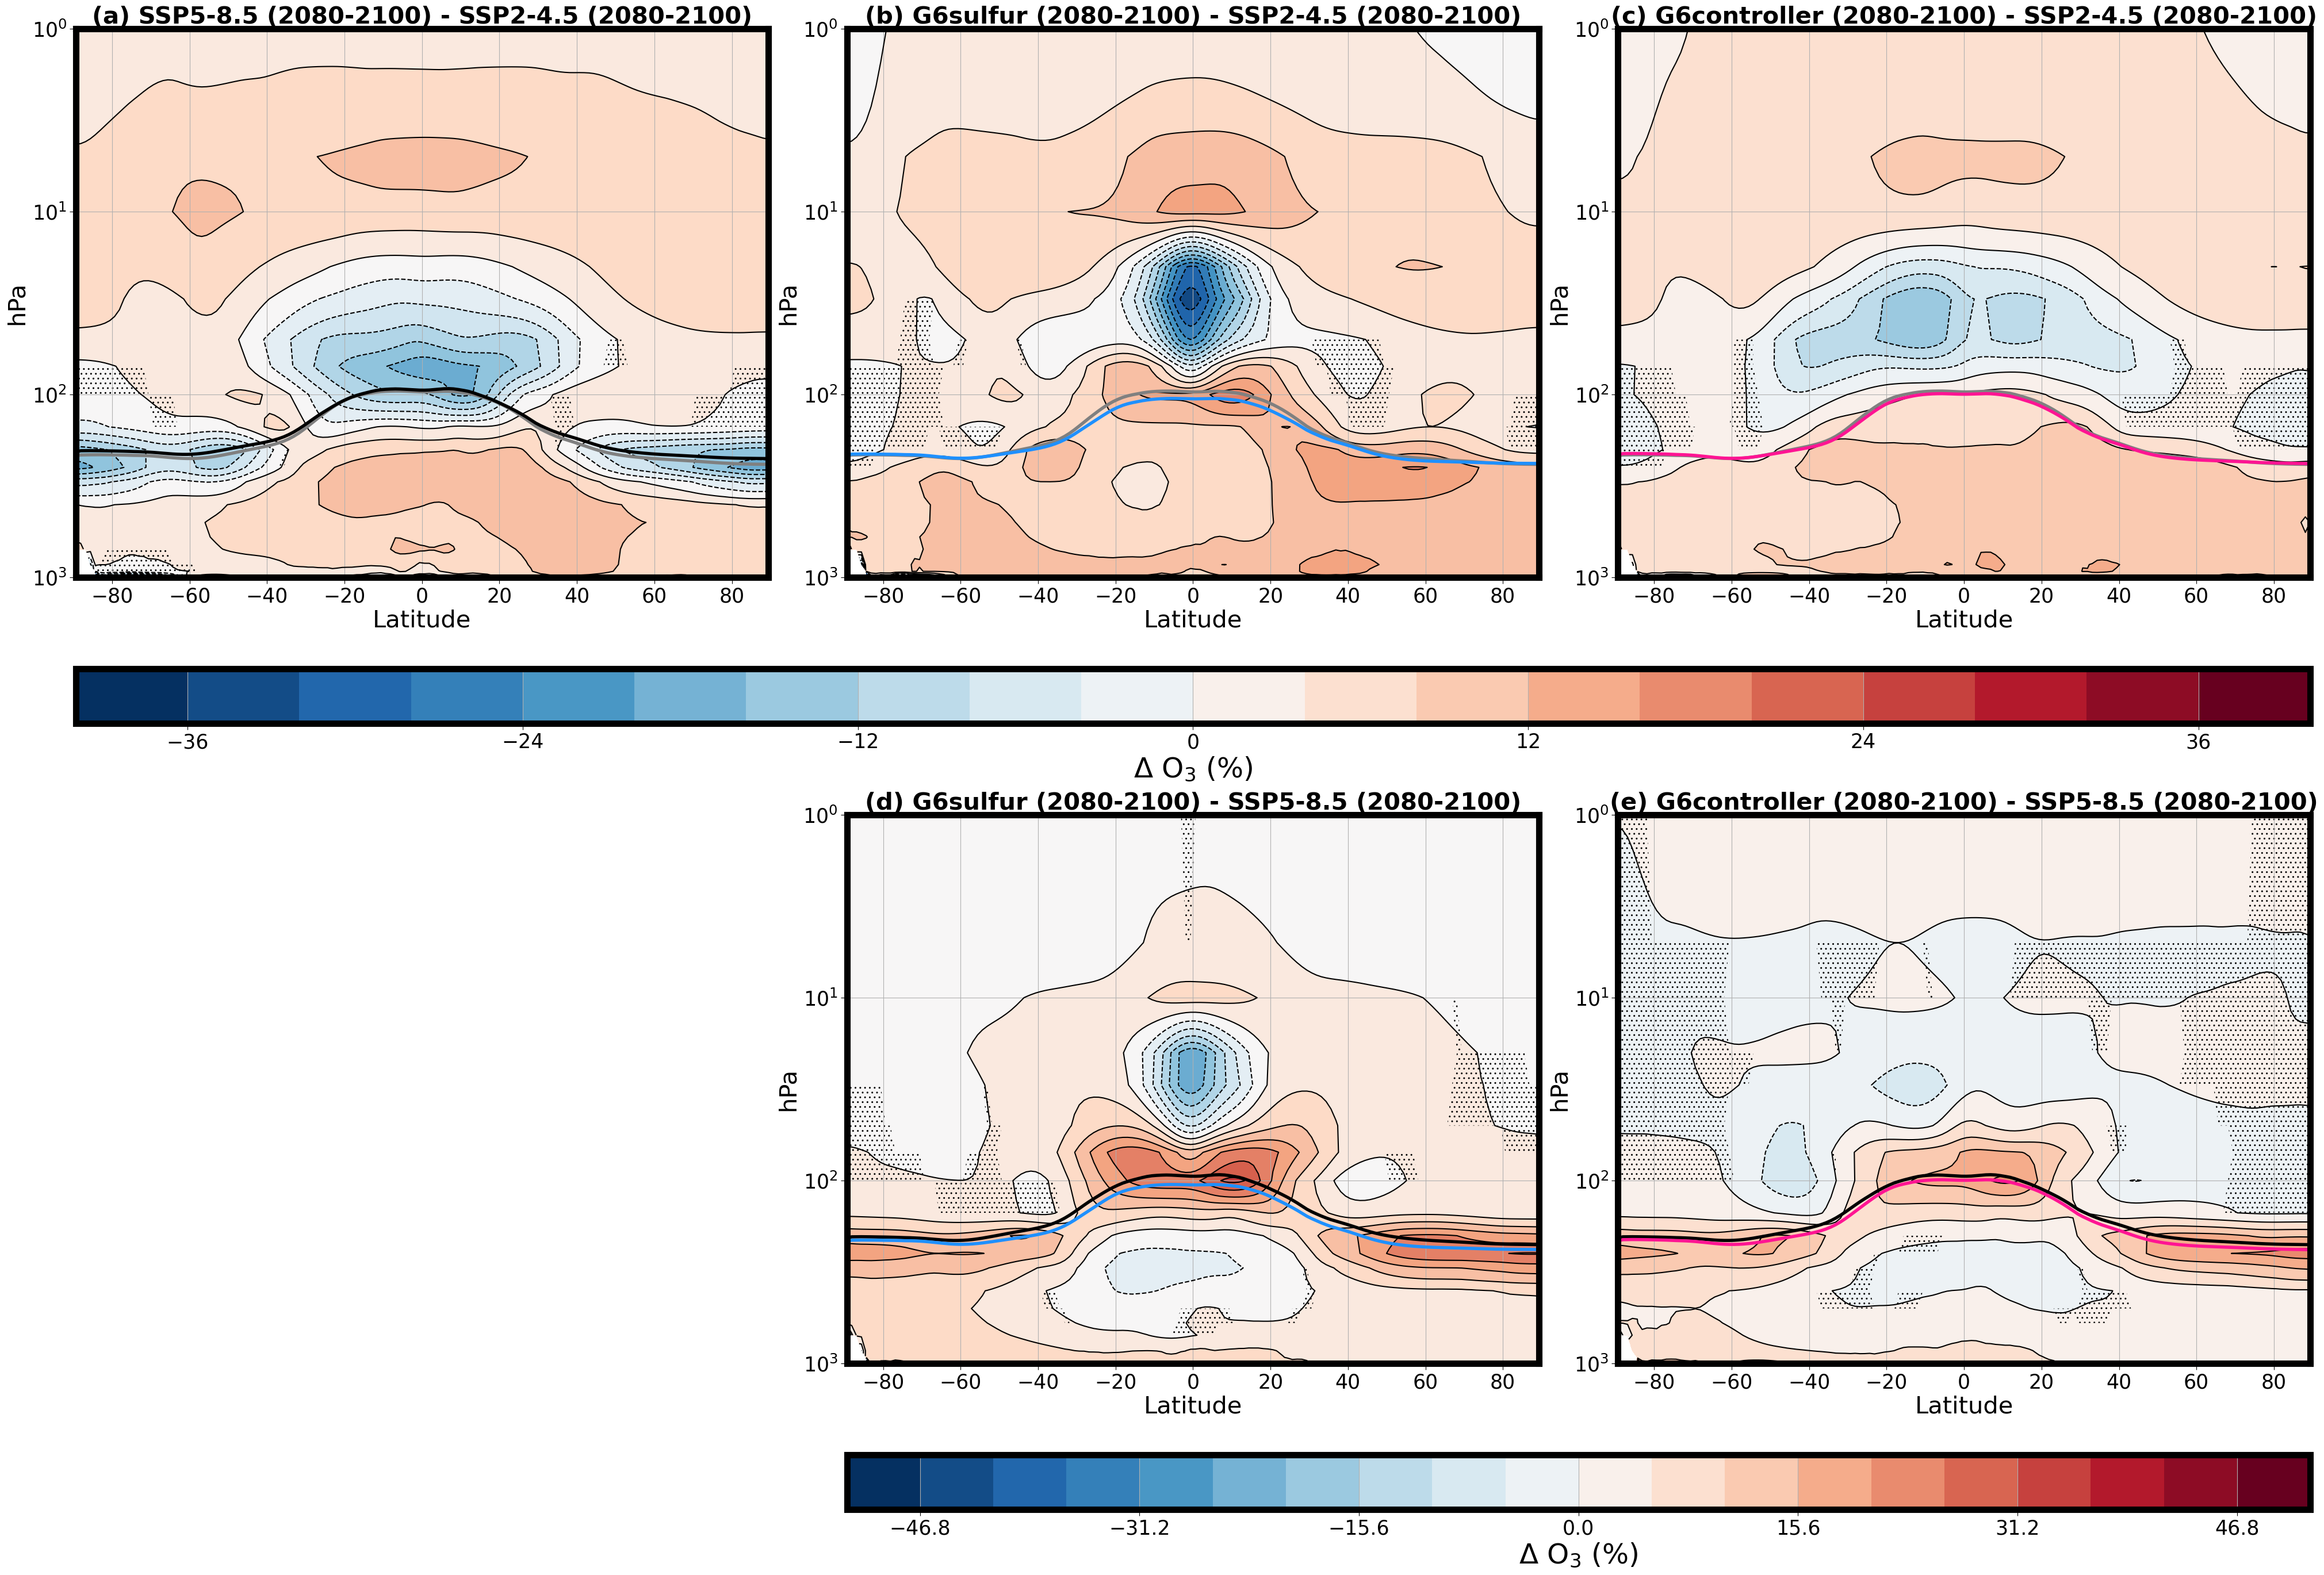

In [27]:
fig = plt.figure(figsize=autosize_figure(2, 3, scale_factor=2.2, yscale_factor=1.3))
gs = GridSpec(4, 3, height_ratios=[10, 1, 10, 1])

col_map = mpl_cm.get_cmap('RdBu_r')
lvs = np.linspace(-40, 40, 21)
norm = colors.BoundaryNorm(lvs, col_map.N)

ax1 = fig.add_subplot(gs[0, 0])
ssp585_perc.plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
ssp585_perc.plot.contour(levels=lvs, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
ssp585_trop_zonal.plot(color='k', linewidth=4)
pval_ssp585.where(pval_ssp585>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax1.invert_yaxis()
ax1.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(a) SSP5-8.5 (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 30)

ax2 = fig.add_subplot(gs[0, 1])
g6sulf_perc.plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
g6sulf_perc.plot.contour(levels=lvs, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
g6sulf_trop_zonal.plot(color='dodgerblue', linewidth=4)
pval_g6sulf.where(pval_g6sulf>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax2.invert_yaxis()
ax2.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(b) G6sulfur (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 30)

ax3 = fig.add_subplot(gs[0, 2])
cb = g6con_perc.plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
g6con_perc.plot.contour(levels=lvs, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
g6con_trop_zonal.plot(color='deeppink', linewidth=4)
pval_g6con.where(pval_g6con>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax3.invert_yaxis()
ax3.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(c) G6controller (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 30)

ax4 = fig.add_subplot(gs[1, :])
col_bar = plt.colorbar(cb, cax=ax4, orientation='horizontal')
col_bar.set_label('$\Delta$ O$_{3}$ (%)', fontsize = 35)

col_map = mpl_cm.get_cmap('RdBu_r')
lvs2 = np.linspace(-52, 52, 21)
norm2 = colors.BoundaryNorm(lvs2, col_map.N)

ax5 = fig.add_subplot(gs[2, 1])
g6sulf_perc_585.plot.contourf(levels=lvs2, cmap=col_map, add_colorbar=False)
g6sulf_perc_585.plot.contour(levels=lvs2, colors='k')
ssp585_trop_zonal.plot(color='k', linewidth=4)
g6sulf_trop_zonal.plot(color='dodgerblue', linewidth=4)
pval_g6sulf_585.where(pval_g6sulf_585>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax5.invert_yaxis()
ax5.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(d) G6sulfur (2080-2100) - SSP5-8.5 (2080-2100)', fontweight='bold', fontsize = 30)

ax6 = fig.add_subplot(gs[2, 2])
cb2 = g6con_perc_585.plot.contourf(levels=lvs2, cmap=col_map, add_colorbar=False)
g6con_perc_585.plot.contour(levels=lvs2, colors='k')
ssp585_trop_zonal.plot(color='k', linewidth=4)
g6con_trop_zonal.plot(color='deeppink', linewidth=4)
pval_g6con_585.where(pval_g6con_585>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax6.invert_yaxis()
ax6.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(e) G6controller (2080-2100) - SSP5-8.5 (2080-2100)', fontweight='bold', fontsize = 30)

ax7 = fig.add_subplot(gs[3, 1:])
col_bar = plt.colorbar(cb2, cax=ax7, orientation='horizontal')
col_bar.set_label('$\Delta$ O$_{3}$ (%)', fontsize = 35)

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure10.png', dpi=200)
plt.show()